# Proyecto PCA 

En este notebook vamos en primer lugar a fusionar dos dataset (hormonas y peso) para luego realziar un analisis PCA y ver que hormona explica mejor los cambios de peso 

In [4]:
cd C:\Users\GermanBo\Desktop\Kschool\proyectos\PCA

C:\Users\GermanBo\Desktop\Kschool\proyectos\PCA


C:\Users\GermanBo\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [40]:
!dir

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: DEF4-F44C

 Directorio de C:\Users\GermanBo\Desktop\Kschool\proyectos\PCA

15/01/2024  16:21    <DIR>          .
15/01/2024  16:21    <DIR>          ..
16/09/2022  01:59            36.932 Hormonas _FeSBi.xlsx
15/01/2024  16:21            20.341 Peso_FeSBi.xlsx
               2 archivos         57.273 bytes
               2 dirs  188.220.674.048 bytes libres


In [41]:
import pandas as pd

In [42]:
df_h = pd.read_excel('Hormonas _FeSBi.xlsx', sheet_name="Resumen")
print(df_h.head)


<bound method NDFrame.head of     Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  Unnamed: 5  \
0          PRM       trat          t    Muestra        IAA         ABA   
1         Raiz       Fe +         24     1A R 1  64.801765    9.879494   
2         Raiz       Fe +         24     1A R 2  60.979732    9.072012   
3         Raiz       Fe +         24    1A R  3  63.138524   12.677577   
4         Raiz       Fe +         24     1A R 4  57.234827    12.02024   
..         ...        ...        ...        ...        ...         ...   
224        P.a     FeBi_2        144     3H H 1  24.120671  167.034175   
225        P.a     FeBi_2        144     3H H 2  24.992791  156.271439   
226        P.a     FeBi_2        144     3H H 3  20.260786  103.104531   
227        P.a     FeBi_2        144     3H H 4  22.284185  124.358717   
228        P.a     FeBi_2        144     3H H 5  23.239468  103.093234   

      Unnamed: 6  Unnamed: 7 Unnamed: 8 Unnamed: 9  
0             SA          JA

In [43]:
df_h.columns = df_h.iloc[0]
df_h = df_h.iloc[1:,]

In [44]:
df_h

,PRM,trat,t,Muestra,IAA,ABA,SA,JA,JAIle,pmoles/g
1,Raiz,Fe +,24,1A R 1,64.801765,9.879494,169.871028,193.407246,4.607014,NaN
2,Raiz,Fe +,24,1A R 2,60.979732,9.072012,379.473529,235.184412,4.922192,NaN
3,Raiz,Fe +,24,1A R 3,63.138524,12.677577,297.074611,113.843496,2.931812,NaN
4,Raiz,Fe +,24,1A R 4,57.234827,12.02024,261.501976,130.362165,2.96846,NaN
5,Raiz,Fe -,24,1B R 1,65.371015,9.041571,198.682477,76.134981,1.549196,NaN
...,...,...,...,...,...,...,...,...,...,...
224,P.a,FeBi_2,144,3H H 1,24.120671,167.034175,545.098039,20.195798,1.248984,NaN
225,P.a,FeBi_2,144,3H H 2,24.992791,156.271439,2397.101449,19.999906,2.694147,NaN
226,P.a,FeBi_2,144,3H H 3,20.260786,103.104531,953.839902,14.821603,0.693565,NaN
227,P.a,FeBi_2,144,3H H 4,22.284185,124.358717,483.574879,9.220633,0.957959,NaN


In [45]:
df_p = pd.read_excel("Peso_FeSBi.xlsx")
df_p

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,trat,NaN,P.aerea,Hoja,Raiz,NaN,NaN,Congelar,NaN,P.aerea,Hoja,Raiz
1,NaN,Fe+,1.0,0.96,0.11,0.3,NaN,NaN,Fe+,1.0,0.9,0.11,0.27
2,NaN,Fe+,2.0,1.01,0.1,0.35,NaN,NaN,Fe+,2.0,1.09,0.16,0.45
3,NaN,Fe+,3.0,1.44,0.17,0.45,NaN,NaN,Fe+,3.0,0.62,0.07,0.23
4,NaN,Fe+,4.0,0.95,0.07,0.28,NaN,NaN,Fe+,4.0,0.59,0.07,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FeBi_2,5.0,0.9,0.14,0.36
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FeBi_2,6.0,0.76,NaN,0.32
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FeBi_2,7.0,0.79,NaN,0.25
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FeBi_2,8.0,0.4,NaN,0.05


In [46]:
df_p = df_p.iloc[:, 1:6]
df_p.columns = df_p.iloc[0]
df_p = df_p.iloc[1:41,]
df_p

,trat,NaN,P.aerea,Hoja,Raiz
1,Fe+,1.0,0.96,0.11,0.3
2,Fe+,2.0,1.01,0.1,0.35
3,Fe+,3.0,1.44,0.17,0.45
4,Fe+,4.0,0.95,0.07,0.28
5,Fe+,5.0,1,0.1,0.46
6,Fe-,1.0,0.98,0.08,0.35
7,Fe-,2.0,1.23,0.07,0.46
8,Fe-,3.0,1.18,0.07,0.51
9,Fe-,4.0,1.18,0.09,0.41
10,Fe-,5.0,0.98,0.1,0.34


In [47]:
print(df_h)

0     PRM    trat    t  Muestra        IAA         ABA           SA  \
1    Raiz    Fe +   24   1A R 1  64.801765    9.879494   169.871028   
2    Raiz    Fe +   24   1A R 2  60.979732    9.072012   379.473529   
3    Raiz    Fe +   24  1A R  3  63.138524   12.677577   297.074611   
4    Raiz    Fe +   24   1A R 4  57.234827    12.02024   261.501976   
5    Raiz    Fe -   24   1B R 1  65.371015    9.041571   198.682477   
..    ...     ...  ...      ...        ...         ...          ...   
224   P.a  FeBi_2  144   3H H 1  24.120671  167.034175   545.098039   
225   P.a  FeBi_2  144   3H H 2  24.992791  156.271439  2397.101449   
226   P.a  FeBi_2  144   3H H 3  20.260786  103.104531   953.839902   
227   P.a  FeBi_2  144   3H H 4  22.284185  124.358717   483.574879   
228   P.a  FeBi_2  144   3H H 5  23.239468  103.093234   596.627648   

0            JA     JAIle pmoles/g  
1    193.407246  4.607014      NaN  
2    235.184412  4.922192      NaN  
3    113.843496  2.931812      NaN  

In [48]:
print( df_p)

0     trat  NaN P.aerea  Hoja  Raiz
1      Fe+  1.0    0.96  0.11   0.3
2      Fe+  2.0    1.01   0.1  0.35
3      Fe+  3.0    1.44  0.17  0.45
4      Fe+  4.0    0.95  0.07  0.28
5      Fe+  5.0       1   0.1  0.46
6      Fe-  1.0    0.98  0.08  0.35
7      Fe-  2.0    1.23  0.07  0.46
8      Fe-  3.0    1.18  0.07  0.51
9      Fe-  4.0    1.18  0.09  0.41
10     Fe-  5.0    0.98   0.1  0.34
11   FeS_1  1.0    1.09  0.06  0.31
12   FeS_1  2.0    1.01  0.08  0.25
13   FeS_1  3.0    0.92  0.06  0.27
14   FeS_1  4.0    1.23  0.08  0.42
15   FeS_1  5.0    0.99  0.05  0.28
16   FeS_2  1.0    1.12  0.08  0.36
17   FeS_2  2.0    1.07  0.08  0.38
18   FeS_2  3.0    1.19  0.02  0.46
19   FeS_2  4.0    1.16  0.08  0.42
20   FeS_2  5.0     1.1  0.03  0.48
21    Bic-  1.0    1.28   0.1  0.31
22    Bic-  2.0    1.58  0.16  0.42
23    Bic-  3.0    1.21  0.14  0.44
24    Bic-  4.0    1.09  0.09  0.33
25    Bic-  5.0    1.12   0.1  0.32
26    Bic+  1.0    1.27  0.14  0.48
27    Bic+  2.0    1.42  0.1

In [49]:
df_fusion = pd.merge(df_p, df_h, on='trat', how='inner')
df_fusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trat      860 non-null    object 
 1   nan       860 non-null    float64
 2   P.aerea   860 non-null    object 
 3   Hoja      860 non-null    object 
 4   Raiz      860 non-null    object 
 5   PRM       860 non-null    object 
 6   t         860 non-null    object 
 7   Muestra   860 non-null    object 
 8   IAA       860 non-null    object 
 9   ABA       860 non-null    object 
 10  SA        860 non-null    object 
 11  JA        860 non-null    object 
 12  JAIle     860 non-null    object 
 13  pmoles/g  0 non-null      object 
dtypes: float64(1), object(13)
memory usage: 94.2+ KB


In [51]:
df_fusion.to_csv('fusion_hor_pes.csv', index=False)

### Analisis PCA 

In [ ]:
cd C:\Users\GermanBo\Desktop\Kschool\proyectos\PCA

In [6]:
df = pd.read_csv('fusion_hor_pes.csv')

In [7]:

df

,trat,Unnamed: 1,P.aerea,Hoja,Raiz,PRM,t,Muestra,IAA,ABA,SA,JA,JAIle,pmoles/g
0,FeS_1,1.0,1.09,0.06,0.31,Raiz,24,1C R 1,59.394632,8.192489,130.013175,8.982735,0.236128,NaN
1,FeS_1,1.0,1.09,0.06,0.31,Raiz,24,1C R 2,65.852480,10.733114,178.846154,14.608428,0.309215,NaN
2,FeS_1,1.0,1.09,0.06,0.31,Raiz,24,1C R 3,60.819767,12.602955,327.296902,26.164911,0.601408,NaN
3,FeS_1,1.0,1.09,0.06,0.31,Raiz,24,1C R 4,55.668605,11.690188,222.850711,36.450511,0.780542,NaN
4,FeS_1,1.0,1.09,0.06,0.31,Raiz,72,2C R 1,54.136181,5.629657,142.575882,36.424703,1.785277,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,FeBi_2,5.0,1.51,0.13,0.47,P.a,144,3H H 1,24.120671,167.034175,545.098039,20.195798,1.248984,NaN
856,FeBi_2,5.0,1.51,0.13,0.47,P.a,144,3H H 2,24.992791,156.271439,2397.101449,19.999906,2.694147,NaN
857,FeBi_2,5.0,1.51,0.13,0.47,P.a,144,3H H 3,20.260786,103.104531,953.839902,14.821603,0.693565,NaN
858,FeBi_2,5.0,1.51,0.13,0.47,P.a,144,3H H 4,22.284185,124.358717,483.574879,9.220633,0.957959,NaN


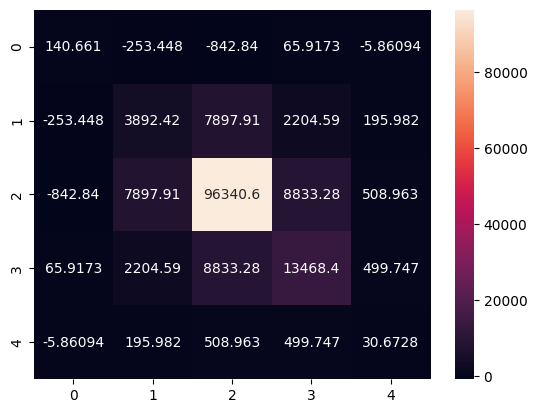

In [6]:
# Heatmap de la covarianzas de las hormonas 
df_1 = df.iloc[:, 8:13].astype(float).fillna(0).values
covMatrix = np.cov(df_1,rowvar = False)


sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()
# En la diagonal veriamos la varianza propia de la variable (de la columna) , podemos ver como la variable 2 presenta una alta varianza 
#Arriba y abajo de estas representa la covarianza con las otras variables. Una covarianza elevada muestra una relacion (ambas varianzas se incrementan)
#un covarianza cercana a cero mostraria poca relacion, mientras que una negativa indicaria que cuando una aumenta la otra disminuye 

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn


In [9]:
# Eliminar la columna 'trat' ya que parece ser una variable categórica y no numérica
df_numeric = df.drop(['trat', "t"], axis=1)
df_numeric = df_numeric.iloc[: , 2:]
#convertir las columnas a numerico, los errors los devuelve coo 0 
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
# Manejar los NaN: Puedes elegir rellenarlos con algún valor o eliminar las filas/columnas con NaN
df_numeric = df_numeric.fillna(0)  # Rellena NaN con 0, puedes ajustar esto según tu necesidad

print(df_numeric.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hoja      860 non-null    float64
 1   Raiz      860 non-null    float64
 2   PRM       860 non-null    float64
 3   Muestra   860 non-null    float64
 4   IAA       860 non-null    float64
 5   ABA       860 non-null    float64
 6   SA        860 non-null    float64
 7   JA        860 non-null    float64
 8   JAIle     860 non-null    float64
 9   pmoles/g  860 non-null    float64
dtypes: float64(10)
memory usage: 67.3 KB
None


In [10]:

# Estandarizar los datos para que tengan media 0 y desviación estándar 1, convertiendose ya en un array

df_scaled = StandardScaler().fit_transform(df_numeric)

df_scaled

array([[-1.15344293, -0.77166147,  0.        , ..., -0.71874464,
        -0.56040564,  0.        ],
       [-1.15344293, -0.77166147,  0.        , ..., -0.67024148,
        -0.5472013 ,  0.        ],
       [-1.15344293, -0.77166147,  0.        , ..., -0.5706047 ,
        -0.49441189,  0.        ],
       ...,
       [ 0.52947671,  1.50640371,  0.        , ..., -0.66840355,
        -0.47776222,  0.        ],
       [ 0.52947671,  1.50640371,  0.        , ..., -0.71669356,
        -0.42999535,  0.        ],
       [ 0.52947671,  1.50640371,  0.        , ..., -0.72579829,
        -0.48918814,  0.        ]])

In [11]:
 #Aplicar PCA, metodo chatgpt
pca = PCA()
pca_resultados = pca.fit_transform(df_scaled)

# Crear un DataFrame con los resultados del PCA
df_pca = pd.DataFrame(data=pca_resultados, columns=['PC{}'.format(i+1) for i in range(df_scaled.shape[1])])

# Añadir la columna 'trat' al nuevo DataFrame
df_pca['trat'] = df['trat']

print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.028439 -1.487400  0.537333 -0.241099  0.278030  0.862421  0.089067   
1 -2.028107 -1.799096  0.430263 -0.512684  0.552567  1.121712  0.060439   
2 -1.666174 -1.462360  0.572667 -0.393200  0.819005  0.851650  0.054323   
3 -1.658101 -1.347595  0.619098 -0.120842  0.408932  0.622745  0.019337   
4 -1.683721 -1.426238  0.605294  0.013503  0.152690  0.516881  0.174679   

            PC8           PC9  PC10   trat  
0 -4.235208e-17 -3.770635e-18  -0.0  FeS_1  
1 -2.916614e-17 -2.528765e-18  -0.0  FeS_1  
2  8.996924e-16 -9.542523e-18  -0.0  FeS_1  
3  8.046454e-17  9.891377e-17  -0.0  FeS_1  
4 -4.533338e-18 -3.619030e-19  -0.0  FeS_1  


In [29]:
# Obtener loadings para cada componente principal
loadings_matrix = pca.components_ # Transponer para tener cada variable en una fila
print(loadings_matrix)
loadings_matrix.shape

[[ 2.47101150e-01  6.48929613e-03  0.00000000e+00  0.00000000e+00
  -2.03158249e-01  4.95515008e-01  3.89787209e-01  4.61667277e-01
   5.35742261e-01  0.00000000e+00]
 [ 2.96845601e-01  1.90942169e-01  0.00000000e+00  0.00000000e+00
  -6.17737539e-01  2.14516570e-01  2.83595183e-01 -4.91528359e-01
  -3.54655319e-01  0.00000000e+00]
 [-2.97583889e-01 -9.05572723e-01 -7.77156117e-16 -3.40005801e-16
  -2.26896105e-01  1.05395750e-01  1.16750759e-01 -1.22222941e-01
  -1.49190408e-02  0.00000000e+00]
 [-7.66008883e-01  3.44386175e-01  4.99600361e-16  1.38777878e-16
  -4.58324736e-01  9.67462694e-02 -1.92526719e-01  4.04660423e-02
   1.91057874e-01 -0.00000000e+00]
 [-3.71847686e-01  1.44102100e-01 -6.10622664e-16 -1.94289029e-16
   2.82143822e-01 -1.97796376e-01  8.40675227e-01 -3.91975011e-02
  -1.18169620e-01 -0.00000000e+00]
 [-1.63700179e-01  6.37918451e-02  8.32667268e-16  4.23272528e-16
   4.85740938e-01  7.31397243e-01 -9.12229672e-02 -4.35153188e-01
   2.38062967e-02  0.00000000e+00

(10, 10)

In [10]:
# metodo kschool
pca = PCA() 
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, df[['trat']]], axis = 1)
finalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,trat
0,-2.028439,-1.487400,0.537333,-0.241099,0.278030,0.862421,0.089067,-4.235208e-17,-3.770635e-18,-0.0,FeS_1
1,-2.028107,-1.799096,0.430263,-0.512684,0.552567,1.121712,0.060439,-2.916614e-17,-2.528765e-18,-0.0,FeS_1
2,-1.666174,-1.462360,0.572667,-0.393200,0.819005,0.851650,0.054323,8.996924e-16,-9.542523e-18,-0.0,FeS_1
3,-1.658101,-1.347595,0.619098,-0.120842,0.408932,0.622745,0.019337,8.046454e-17,9.891377e-17,-0.0,FeS_1
4,-1.683721,-1.426238,0.605294,0.013503,0.152690,0.516881,0.174679,-4.533338e-18,-3.619030e-19,-0.0,FeS_1


Varianza acumulativa: [0.356051   0.53619755 0.68058598 0.8122404  0.90674544 0.97797045
 1.         1.         1.         1.        ]


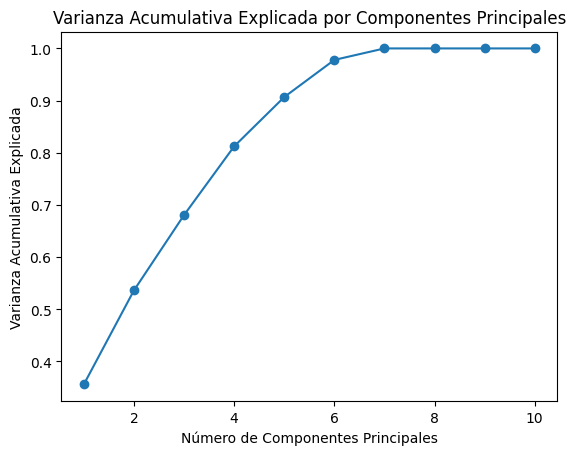

In [14]:

# Visualizar la suma acumulativa de la varianza explicada
# Obtener la varianza explicada
varianza_explicada = pca.explained_variance_ratio_

# Visualizar la suma acumulativa de la varianza explicada
varianza_acumulativa = varianza_explicada.cumsum()
print("Varianza acumulativa:", varianza_acumulativa)

# Graficar la varianza explicada
import matplotlib.pyplot as plt

plt.plot(range(1, len(varianza_acumulativa) + 1), varianza_acumulativa, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.title('Varianza Acumulativa Explicada por Componentes Principales')
plt.show()